# Teste de Ryan-Joiner

## Importações

In [1]:
## importing sugar, spice, and everything nice
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import time
# adding the normtest path to sys 
import sys
sys.path.insert(0, 'C:/Users/ander/Repositorios/normtest')
from normtest import normtest

In [2]:
def timer(start,end):
    print(time.strftime("%Hh %Mm %Ss", time.gmtime(end-start)) )

## Gráfico distribuição Normal

In [3]:
size = 100
seed = 42

C:\Users\ander\AppData\Local\Temp\ipykernel_21836\2814637096.py:2: UserWarning: This function is experimental and its behavior may not be ideal.


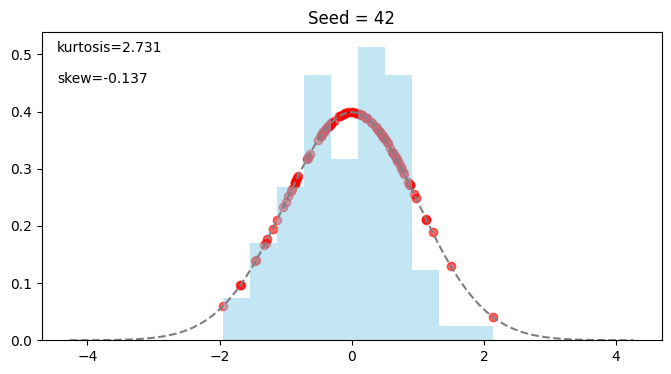

In [4]:
fig, ax = plt.subplots(figsize=(8,4))
normtest.normal_distribution_plot(ax, size, seed=seed)
# plt.savefig("dist_normal.png", bbox_inches="tight")
plt.show()

## Gráfico de probabilidade Normal

C:\Users\ander\AppData\Local\Temp\ipykernel_21836\2590402633.py:5: UserWarning: This function is experimental and its behavior may not be ideal.


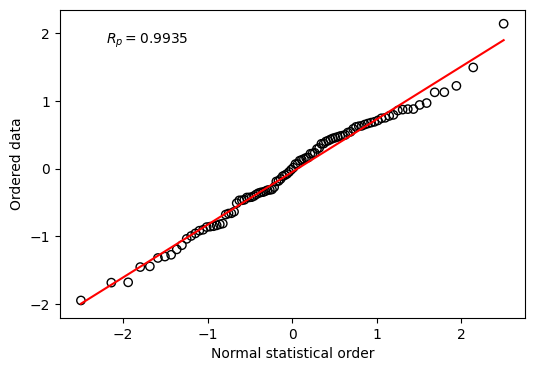

In [5]:
rng = np.random.default_rng(seed=seed)
normal_data = rng.normal(loc=0, scale=1.0, size=size)

fig, ax = plt.subplots(figsize=(6,4))
normtest.rj_correlation_plot(ax, normal_data)
# plt.savefig("prob_normal.png", bbox_inches="tight")
plt.show()

## Exemplo

In [6]:
x_data = np.array([1.90642, 2.22488, 2.10288, 1.69742, 1.52229, 3.15435, 2.61826, 1.98492, 1.42738, 1.99568])

In [7]:
result = normtest.ryan_joiner(x_data)
result

RyanJoiner(statistic=0.9599407779411523, critical=0.9178948637370312, p_value='p > 0.100', conclusion='Fail to reject H₀')

C:\Users\ander\AppData\Local\Temp\ipykernel_21836\704991367.py:2: UserWarning: This function is experimental and its behavior may not be ideal.


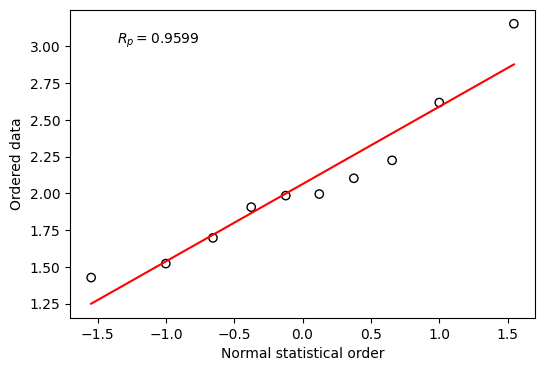

In [8]:
fig, ax = plt.subplots(figsize=(6,4))
normtest.rj_correlation_plot(ax, x_data)
# plt.savefig("prob_exp.png", bbox_inches="tight")
plt.show()

## Estudo do nível de singificância do teste



In [9]:
import time

In [10]:
answer_to_life_the_universe_everything = 42
n_samples = 10000
n_min = 4
n_max = 30
alphas = [0.1, 0.05, 0.01]

C:\Users\ander\AppData\Local\Temp\ipykernel_21836\1289742819.py:10: UserWarning: This function is experimental and its behavior may not be ideal.


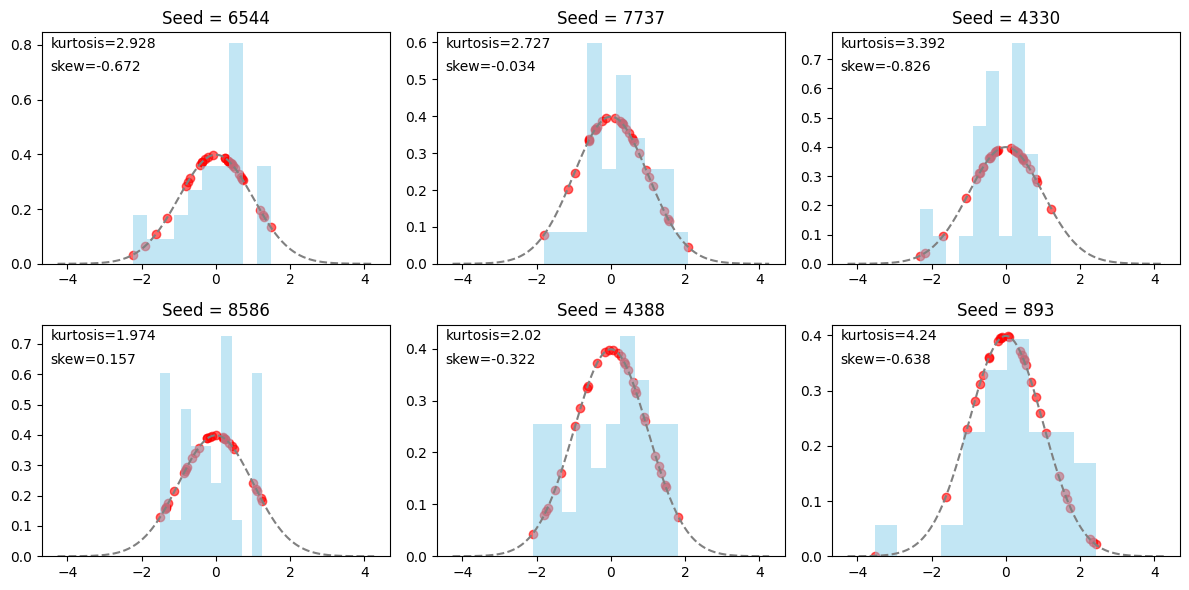

In [11]:
seeds = np.arange(1,n_samples+1)
rng = np.random.default_rng(answer_to_life_the_universe_everything)
seed_to_visualize_data = rng.choice(seeds, size=6, replace=False)
rows = 2
columns = 3
fig, ax = plt.subplots(rows, columns, figsize=(12,6))
i = 0
for row in range(rows):
    for column in range(columns):
        normtest.normal_distribution_plot(ax[row,column], n_max, seed_to_visualize_data[i])
        i += 1
fig.tight_layout()
plt.show()

In [12]:
start = time.time()

seeds = np.arange(1,n_samples+1)
rng = np.random.default_rng(answer_to_life_the_universe_everything)
rng.shuffle(seeds)

n_rep = np.arange(n_min, n_max)

seed_values = []
alpha_list = []
blom_1 = []
blom_2 = []
blom_3 = []
n_rep_list = []
for seed in seeds:
    rng = np.random.default_rng(seed=seed)
    normal_data = rng.normal(loc=0, scale=1.0, size=max(n_rep))

    for n in n_rep:
        for alpha in alphas:
            n_rep_list.append(n)
            seed_values.append(seed)
            if alpha == 0.1:
                alpha_list.append("0.10")
            elif alpha == 0.05:
                alpha_list.append("0.05")
            else:
                alpha_list.append("0.01")

            result = normtest.ryan_joiner(x_data=normal_data[:n], method="blom", alpha=alpha)
            if result.statistic < result.critical:
                blom_1.append(False)
                
            else:
                blom_1.append(True)

            result = normtest.ryan_joiner(x_data=normal_data[:n], method="blom2", alpha=alpha)
            if result.statistic < result.critical:
                blom_2.append(False)
                
            else:
                blom_2.append(True)                

            result = normtest.ryan_joiner(x_data=normal_data[:n], method="blom3", alpha=alpha)
            if result.statistic < result.critical:
                blom_3.append(False)
                
            else:
                blom_3.append(True)                                
        


df_data = pd.DataFrame({
    "Alpha": alpha_list,
    "n amostral": n_rep_list,
    "blom": blom_1,
    "blom2": blom_2,
    "blom3": blom_3,        

})



C:\Users\ander\AppData\Local\Temp\ipykernel_21836\3670024204.py:2: UserWarning: This function is experimental and its behavior may not be ideal.


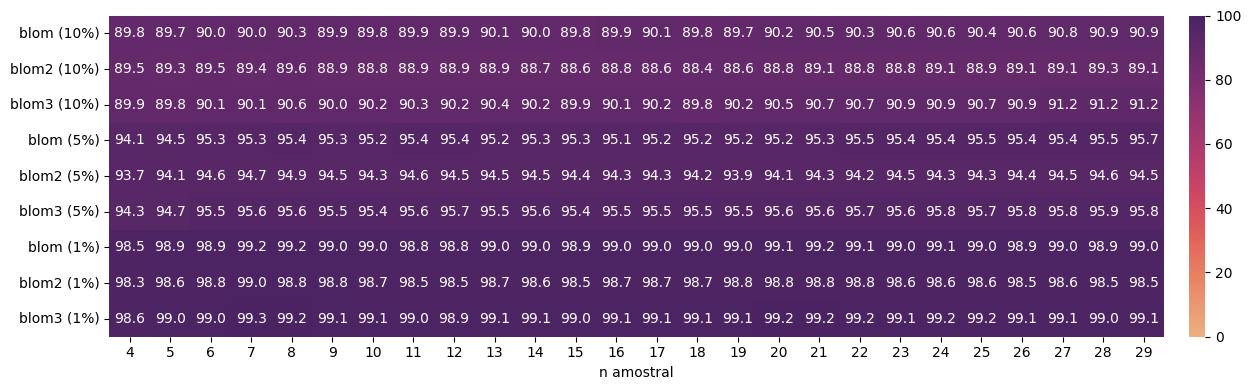

In [13]:
fig, ax = plt.subplots(figsize=(14,4))    
ax, df = normtest.make_heatmap(ax, data_frame=df_data, n_samples=n_samples, alpha_column_name="Alpha", n_rep_name="n amostral", tests_column_names=["blom", "blom2", "blom3"])
fig.tight_layout()
# plt.savefig("make_bar_plot_42.png", bbox_inches='tight')
plt.show()   

C:\Users\ander\AppData\Local\Temp\ipykernel_21836\575262363.py:2: UserWarning: This function is experimental and its behavior may not be ideal.


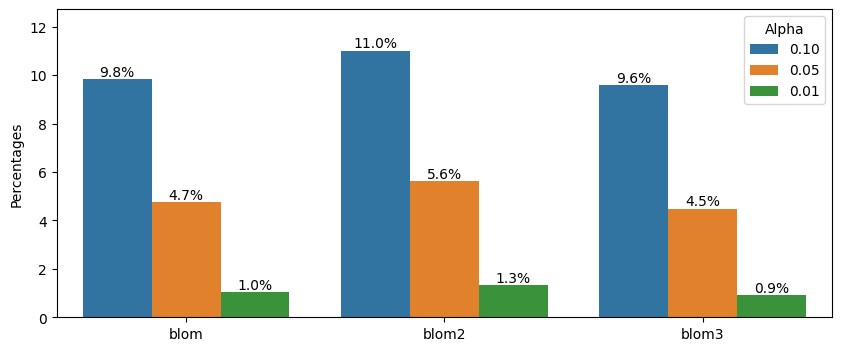

In [14]:
fig, ax = plt.subplots(figsize=(10,4))    
ax, df = normtest.make_bar_plot(ax, data_frame=df_data, n_samples=n_samples, alpha_column_name="Alpha", n_rep_name="n amostral", tests_column_names=["blom", "blom2", "blom3"], normal=False )
# fig.tight_layout()
# plt.savefig("make_bar_plot_42.png", bbox_inches='tight')
plt.show()   

In [15]:
end = time.time()
timer(start,end)

00h 34m 13s


## Equações

$$p_{i}=\frac{i-3/8}{n+1/4}$$

$$p_{i}=\frac{i}{n+1}$$

$$p_{i}=\frac{i-1/2}{n}$$


$$p_{i}=\frac{i-\alpha}{n-2\alpha+1}$$

onde $\alpha$ é uma constante determinada. A primeira equação adota $\alpha=3/8$, enquanto que a segunda equação adota $\alpha=0$ e a terceira utiliza $\alpha=1/2$.

$$b_{i}=\phi^{-1} \left(p_{i} \right)$$

$$R_{p} = \frac{\sum_{i=1}^{n} \left(x_{i} - \overline{x} \right) \left(b_{i} - \overline{b} \right)    }{\sqrt{\sum_{i=1}^{n} \left(x_{i} - \overline{x} \right)^{2} \times \sum_{i=1}^{n} \left(b_{i} - \overline{b} \right)^{2}}}$$

$$R_{critico} \left(n \right) =a_{0} + \frac{a_{1}}{\sqrt{n}} + \frac{a_{2}}{n} + \frac{a_{3}}{n^{2}} $$

Os valores dos parâmetros estão resumidos na tabela abaixo.

| Coef. | $\alpha=10\%$ | $\alpha=5\%$ | $\alpha=1\%$ |
| - | - | - | - |
| $a_0$ | $1.0071$ | $1.0063$ | $0.9963$ |
| $a_1$ | $-0.1371$ | $-0.1288$ | $-0.0211$ |
| $a_2$ | $-0.3682$ | $-0.6118$ | $-1.4106$ |
| $a_3$ | $0.7780$ | $1.3505$ | $3.1791$ |
.

